In [ ]:
import sys
!{sys.executable} -m pip install numpy

In [ ]:
!{sys.executable} -m pip install pandas

In [ ]:
!{sys.executable} -m pip install scanpy

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.0 scipy==1.7.0 pandas==1.3.0 scikit-learn==0.24.2 statsmodels==0.12.2 pynndescent==0.5.4


In [3]:
adata = sc.read_h5ad('rawCleanadata.h5ad')

In [4]:
adata.var_names

Index(['Xkr4', 'Mrpl15', 'Lypla1', 'Gm37988', 'Tcea1', 'Rgs20', 'Gm16041',
       'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       ...
       'AC132444.1', 'Csprs', 'AC132444.6', 'AC125149.3', 'AC125149.2',
       'AC168977.2', 'AC168977.1', 'AC149090.1', 'CAAA01118383.1',
       'CAAA01147332.1'],
      dtype='object', name='index', length=20605)

In [5]:
print(adata.X.shape)

(7620, 20605)


In [6]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:22)


In [7]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [8]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


In [9]:
sc.pp.log1p(adata)
sc.pp.scale(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


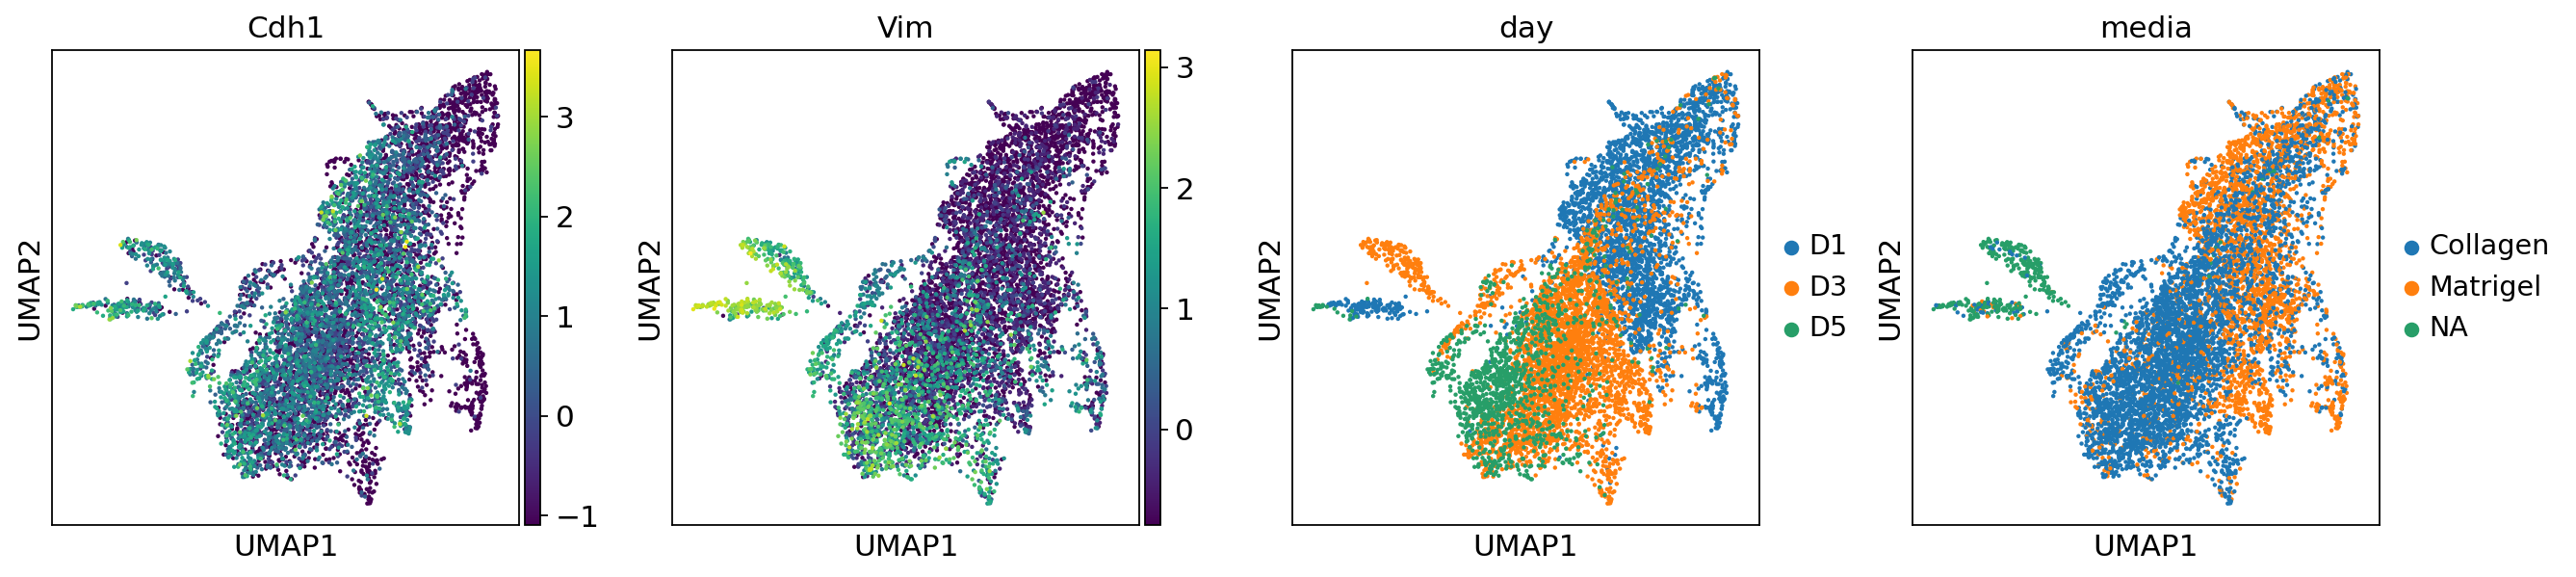

In [10]:
sc.pl.umap(adata, color=['Cdh1', 'Vim', 'day','media'])

In [17]:
s_genes = [x.strip() for x in open('./regev_lab_cellCycle_smouse.txt')]
g2m_genes = [x.strip() for x in open('./regev_lab_cellCycle_mmouse.txt')]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    640 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    637 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [21]:
adata.write_csvs('./', )

writing .csv files to .


In [ ]:
sc.pl.umap(adata, color=['phase'])

In [ ]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['Cdh1', 'Vim', 'day','media','phase'])

In [ ]:
adata.collagen = adata[adata.obs['media']=='Collagen',]
print(adata.collagen.X.shape)

In [ ]:
sc.tl.pca(adata.collagen, svd_solver='arpack')
sc.pp.neighbors(adata.collagen, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata.collagen)

In [ ]:
sc.pl.umap(adata.collagen, color=['Cdh1', 'Vim', 'day','media','phase'])

In [ ]:
sc.tl.leiden(adata.collagen)


In [ ]:
sc.pl.umap(adata.collagen, color=['leiden', 'Vim', 'Cdh1','day'])

In [ ]:
sc.tl.rank_genes_groups(adata.collagen, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata.collagen, n_genes=25, sharey=False)
adata.collagen.write('./collagenClusterMarkers.txt')

In [ ]:
sc.pl.violin(adata.collagen, ['Vim', 'Cdh1'], groupby='leiden')

In [ ]:
adata.matrigel = adata[adata.obs['media']=='Matrigel',]
print(adata.matrigel.X.shape)

In [ ]:
sc.tl.pca(adata.matrigel, svd_solver='arpack')
sc.pp.neighbors(adata.matrigel, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata.matrigel)

In [ ]:
sc.pl.umap(adata.matrigel, color=['Cdh1', 'Vim', 'day','media','phase'])